<a href="https://colab.research.google.com/github/Nagaraj-gt/sl1-quarterly-results-stock-predictor/blob/main/Group9_SL_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building Regression Model for predicting next quarter stock price deviations



## Preparing Code

In [13]:
# Importing necessary libraries

import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


##STEP 1: Collect/Extract Data

In [3]:

# The data is prepared alreadt in excel.
fmcg_companies_df = pd.read_csv("20companies_Dataset_v8.csv")



## STEP 2: Pre-Process the Data
The missing values are taken care of prior. The data prepared is handmade referencing data from moneycontrol.com

## Outlier Analysis

In [14]:
fmcg_companies_z_df = fmcg_companies_df.copy()

fmcg_companies_z_df['Z_Net Sales/Income from operations'] = zscore(fmcg_companies_z_df['Net Sales/Income from operations'])
fmcg_companies_z_df[ (fmcg_companies_z_df['Z_Net Sales/Income from operations'] > 3.0) | (fmcg_companies_z_df['Z_Net Sales/Income from operations'] < -3.0) ]

,Company,quarter,Net Sales/Income from operations,Total Income From Operations,Consumption of Raw Materials,Purchase of Traded Goods,Increase/Decrease in Stocks,Employees Cost,Depreciation,Other Expenses,...,Equity Share Capital,Basic EPS,QtrOpenPrice,QtrClosePrice,GDP,Gold Price (USD),ExchangeRate,CPI,Next Stock Deviation,Z_Net Sales/Income from operations
172,ITC,Mar-16,9756.70,9756.70,3033.84,819.37,-286.05,554.71,246.48,2029.78,...,804.72,1.97,218.38,218.68,7.1,153.86,68.218002,102.52,-0.086435,3.084321
192,ITC,Jun-16,9957.66,10054.04,2880.04,1004.84,360.70,700.31,261.25,1581.92,...,805.33,1.97,217.94,245.38,7.3,164.12,67.193001,104.94,0.058601,3.161304
252,ITC,Mar-17,11125.54,11125.54,2972.84,1195.73,514.23,571.36,241.81,1995.99,...,1214.74,2.20,241.95,280.45,5.7,153.40,66.705002,104.94,0.065105,3.608690
272,ITC,Jun-17,9876.45,9954.66,2894.90,990.89,-49.79,674.63,268.21,1697.63,...,1215.22,2.11,281.10,323.85,6.3,151.87,64.500504,106.47,0.008957,3.130194
292,ITC,Sep-17,9676.20,9763.92,2858.00,558.82,939.55,606.54,282.42,1589.71,...,1218.36,2.17,345.25,258.25,7.0,156.15,63.925499,109.02,0.142090,3.053483
312,ITC,Dec-17,9672.57,9772.02,2941.91,498.90,140.22,595.02,290.75,1691.47,...,1219.05,2.54,259.25,263.10,6.1,158.60,64.499603,109.79,-0.050222,3.052093
332,ITC,Mar-18,10479.24,10586.73,3061.40,927.93,11.87,611.27,303.99,1830.25,...,1220.43,2.41,263.30,255.90,8.2,159.48,65.239998,109.91,0.017708,3.361108
352,ITC,Jun-18,10554.66,10707.03,3052.92,1254.38,-197.92,742.97,298.69,1652.56,...,1220.74,2.31,258.50,266.05,7.1,150.02,67.420502,110.68,0.208929,3.390000
372,ITC,Sep-18,10891.23,11068.85,3381.90,876.09,21.68,596.31,327.47,1986.90,...,1224.19,2.42,268.00,296.70,7.2,141.78,70.735001,115.14,-0.170447,3.518931
392,ITC,Dec-18,11136.55,11227.66,3414.82,838.57,47.12,629.17,335.36,1972.21,...,1224.69,2.62,300.65,281.65,7.7,151.12,69.770500,115.40,0.082532,3.612907


From above there are around 18 outliers with all right skewed. Plotting boxpot for better intuity.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


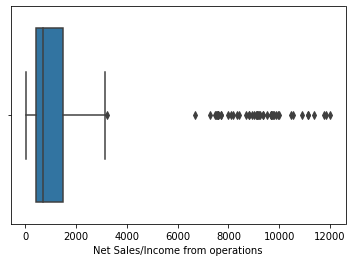

In [15]:
box = sn.boxplot(fmcg_companies_df['Net Sales/Income from operations'])

### Labelling Data with stock deviation in next quarter

In [16]:
# Create an empty list
stock_list =[]
  
# Iterate over each row
for index, rows in fmcg_companies_df.iterrows():
    # Create list for the current row

    stock_deviation = (rows.get('QtrClosePrice') - rows.get('QtrOpenPrice'))/rows.get('QtrOpenPrice')
    stock_list.append(stock_deviation) 

stock_list.append(0)
## Assigning stock deviation for next quarter to current quater financial results
fmcg_companies_df['Next Stock Deviation'] = stock_list[1:len(stock_list)]



In [17]:
## Normalizing Data as scales differs 

X_features = ['Net Sales/Income from operations',
              'Total Income From Operations',
              'Consumption of Raw Materials',
              'Employees Cost',
              'Depreciation',
              'Other Expenses',
              'P/L Before Tax',
              'Tax',
              'Net Profit/(Loss) For the Period',
              'Equity Share Capital',
              'Basic EPS',
              'GDP',
              'Gold Price (USD)']

scaler = StandardScaler()


## STEP 3: Dividing Data into Training and Validation Datasets

### X values are ,

1. Net Sales/Income from operations
2. Total Income From Operations
3. Consumption of Raw Materials
4. Employees Cost
5. Depreciation
6. Other Expenses
7. P/L Before Tax
8. Tax
9. Net Profit/(Loss) For the Period
10. Equity Share Capital
11. Basic EPS
12. GDP Growth Rate
13. Gold Price (USD) ( TBD to be converted)
14. CPI ( TBD)

### Y to be predicted is **Next Stock Deviation**

In [18]:
X = sm.add_constant(fmcg_companies_df[X_features] )
X_Scaled = scaler.fit_transform(X)
X_features.insert(1,'const')
X_scaled_df = df = pd.DataFrame(data=X_Scaled, index=None, columns=X_features)
Y = fmcg_companies_df['Next Stock Deviation']
Y = (Y - Y.mean()) / Y.std()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [35]:
train_X, test_X, train_y, test_y = train_test_split( X_scaled_df, 
 Y, test_size=1/6, shuffle=False )

## STEP 5: Build the Model

In [20]:
next_stock_deviation_lm = sm.OLS( train_y, train_X ).fit()

### Intepretation of estimated parameters

In [9]:
print( next_stock_deviation_lm.params )

Net Sales/Income from operations    0.000000
const                              -7.858201
Total Income From Operations        7.673530
Consumption of Raw Materials       -0.013500
Employees Cost                      0.278174
Depreciation                       -0.176467
Other Expenses                      0.083291
P/L Before Tax                     -1.023740
Tax                                -0.021282
Net Profit/(Loss) For the Period    0.842844
Equity Share Capital                0.245431
Basic EPS                          -0.026800
GDP                                -0.228359
Gold Price (USD)                    0.014203
dtype: float64


***Total Income From Operations*** contributes majorly for the slope of regression line. Next comes,***P/L Before Tax*** and ***Net Profit/(Loss) For the Period*** However these are with much lesser contributions.

## STEP 6: Perform Model Diagnostics

1. Co-efficient of determination (R-squared).
2. Hypothesis test for the regression coefficient.
3. Analysis of variance for overall model validity (important for multiple linear regression).
4. Residual analysis to validate the regression model assumptions.
5. Outlier analysis, since the presence of outliers can significantly impact the regression parameters.

### Regression model summary

In [10]:
next_stock_deviation_lm.summary2()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                  OLS                  Adj. R-squared (uncentered): 0.041    
Dependent Variable:     Next Stock Deviation AIC:                         1150.8554
Date:                   2022-09-03 19:03     BIC:                         1202.7444
No. Observations:       400                  Log-Likelihood:              -562.43  
Df Model:               13                   F-statistic:                 2.329    
Df Residuals:           387                  Prob (F-statistic):          0.00545  
R-squared (uncentered): 0.073                Scale:                       1.0073   
-----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
-----------------------------------------------------------------------------------
Net Sales/Income from operations    0.0000   0.0000     nan    nan   0.0000  0.0000
const                              -7.8582   4.8293 -1.6272 0.1045 -17.3531  1.6367
Total Income From Operations        7.6735   4.8555  1.5804 0.1148  -1.8730 17.2201
Consumption of Raw Materials       -0.0135   0.3356 -0.0402 0.9679  -0.6733  0.6463
Employees Cost                      0.2782   0.2648  1.0507 0.2941  -0.2424  0.7987
Depreciation                       -0.1765   0.2163 -0.8157 0.4152  -0.6018  0.2489
Other Expenses                      0.0833   0.3453  0.2412 0.8095  -0.5956  0.7622
P/L Before Tax                     -1.0237   1.6054 -0.6377 0.5241  -4.1801  2.1326
Tax                                -0.0213   0.1575 -0.1351 0.8926  -0.3309  0.2884
Net Profit/(Loss) For the Period    0.8428   1.5647  0.5387 0.5904  -2.2335  3.9192
Equity Share Capital                0.2454   0.2531  0.9696 0.3328  -0.2522  0.7431
Basic EPS                          -0.0268   0.0641 -0.4183 0.6760  -0.1528  0.0992
GDP                                -0.2284   0.0597 -3.8282 0.0002  -0.3456 -0.1111
Gold Price (USD)                    0.0142   0.0626  0.2269 0.8206  -0.1088  0.1372
-----------------------------------------------------------------------------------
Omnibus:                   222.783            Durbin-Watson:               1.846   
Prob(Omnibus):             0.000              Jarque-Bera (JB):            2711.400
Skew:                      2.095              Prob(JB):                    0.000   
Kurtosis:                  15.047             Condition No.:               inf     
===================================================================================
* The condition number is large (inf). This might indicate             strong
multicollinearity or other numerical problems.
"""

The summary output could be inferred as below :

1. R-squared value is 0.073. This means the model is able to **explain 7% **of variations in stock price deviation.

2. The p-value for most are high apart from **GDP** and '**Total Income From Operations**'. For GDP Growth rate its close to 0 indicating significance statistically. 'Total Income From Operations' is about 0.11 which has significance relatively. Also **Total Income From Operations** contributes majorly to the regression line slope.

3. **P/L Before Tax** and **Net Profit/(Loss) For the Period** does influence slope relatively. However its statistically insignificant with higher p-value.

4. The probability F-statistics is 0.00545. **This indicates thar overall model is statistically significant.**

### So from this model summary and co-efficients, GDP and 'Total Income From Operations' are statistically significant with later explaining largely for the stock variations.


### Residual Analysis

<Figure size 576x432 with 0 Axes>

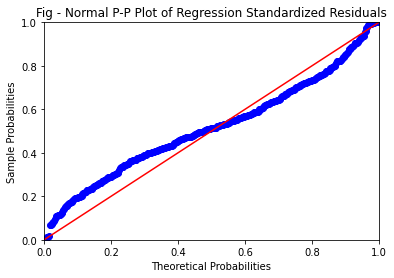

In [11]:
next_stock_deviation_resid = next_stock_deviation_lm.resid 
probplot = sm.ProbPlot(next_stock_deviation_resid) 
plt.figure( figsize = (8, 6)) 
probplot.ppplot( line='45' )
plt.title( "Fig - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()


## The model is significant and above residual plot approximately follows normal distribution. So the assumption of regression for residuals to follow normal distribution hold good.

##However the reason 12 out of 14 factors are insignificant indicates multi-collinearity.

### Removal of Multi-collinearity

Multi-collinearity might inflate standard error of estimates. It also results in large p-values making statistically significant variable insignificant. 

With multi-collinearity, the model would be highly senstivite to adding or removing of factors. Worst case ,even the negative and positive sign of co-efficients might get flipped. 

In [21]:
## Calculation of Variation Inflation Factor (VIF) to understand high multi correlation. Feartures with VIF > 4 need ot be assessed.

def get_vif_factors( X ): 
  X_matrix = X.values
  vif = [ variance_inflation_factor( X_matrix, i ) for i in range ( X_matrix.shape[1] ) ]
  vif_factors = pd.DataFrame() 
  vif_factors['column'] = X.columns 
  vif_factors['VIF'] = vif
  return vif_factors


In [22]:
vif_factors = get_vif_factors( X_scaled_df ) 
vif_factors

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,column,VIF
0,Net Sales/Income from operations,NaN
1,const,10087.250384
2,Total Income From Operations,10097.045979
3,Consumption of Raw Materials,43.069374
4,Employees Cost,24.134087
5,Depreciation,15.131166
6,Other Expenses,41.500495
7,P/L Before Tax,329.613366
8,Tax,11.206608
9,Net Profit/(Loss) For the Period,175.700382


### Correlation of factors with large VIF > 4

Text(0.5, 1.0, 'Figure - Heatmap depicting correlation between features')

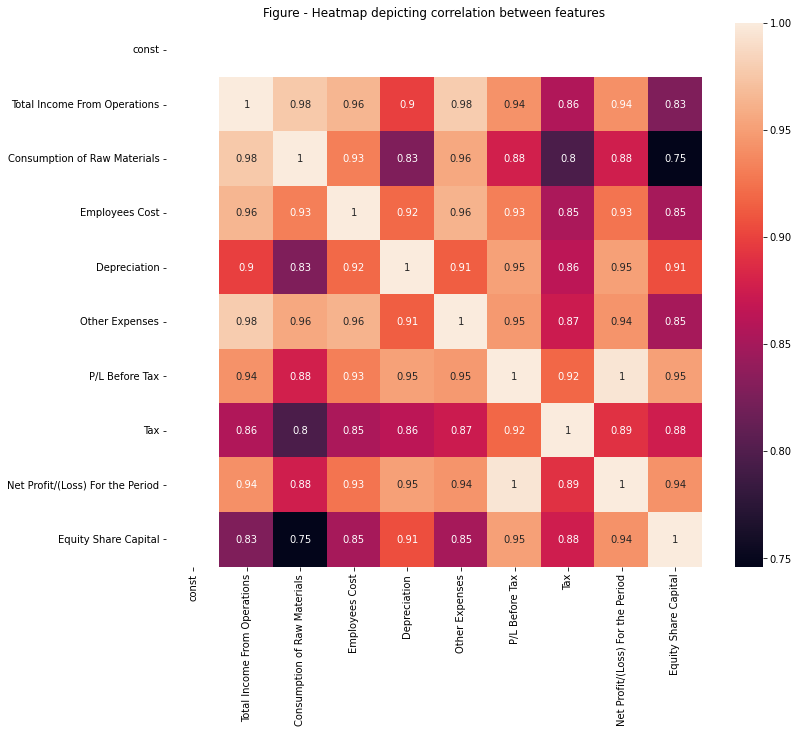

In [23]:
columns_with_large_vif = vif_factors[vif_factors.VIF > 4].column

## Plotting correlation matrix with VIF > 4

plt.figure( figsize = (12,10) )
sn.heatmap( X[columns_with_large_vif].corr(), annot = True );
plt.title("Figure - Heatmap depicting correlation between features")

Based on above heatmap, following could be inferred. Lets consider 0.95  above as highly correlated.

1. Consumption of Raw Materials, Employee Cost, Other Expenses, Total Income from Operations, P/L Before Tax are highly correlated.

2. Depreciation , P/L Before Tax,Net Profit/(Loss) For the Period and Equity Share Capital are highly correlated

### Based one above observations lets consider one of factors for model run. Selected factors are ,

1. Total Income from Operations
2. Equity Share Capital

**And remove other factors.**

In [28]:
columns_to_remove = ['Net Sales/Income from operations','Employees Cost','Other Expenses','P/L Before Tax','Net Profit/(Loss) For the Period','Consumption of Raw Materials','Depreciation']

X_new_features = list( set(X_features) - set(columns_to_remove))

get_vif_factors( X[X_new_features] )


,column,VIF
0,Gold Price (USD),1.228527
1,Total Income From Operations,4.218491
2,GDP,1.223776
3,Equity Share Capital,4.953650
4,Tax,5.668109
5,Basic EPS,1.050325
6,const,435.784404


The observations made out of above is as follows,

1. The 6 factors above are relatively much independent  

2. 'Total Income From Operations', 'Equity Share Capital' and 'Tax' with marginal correlation.

In [29]:
### Building new model

train_X_new = train_X[X_new_features]
model_2 = sm.OLS(train_y, train_X_new).fit()
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                  OLS                  Adj. R-squared (uncentered): 0.050    
Dependent Variable:     Next Stock Deviation AIC:                         1141.3561
Date:                   2022-09-03 19:54     BIC:                         1169.2963
No. Observations:       400                  Log-Likelihood:              -563.68  
Df Model:               7                    F-statistic:                 4.014    
Df Residuals:           393                  Prob (F-statistic):          0.000293 
R-squared (uncentered): 0.067                Scale:                       0.99817  
------------------------------------------------------------------------------------
                                Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------------------------
Gold Price (USD)                0.0160    0.0617   0.2600  0.7950   -0.1053   0.1374
Total Income From Operations    8.3907    4.6493   1.8047  0.0719   -0.7499  17.5313
GDP                            -0.2262    0.0585  -3.8641  0.0001   -0.3413  -0.1111
Equity Share Capital            0.1119    0.1234   0.9071  0.3649   -0.1307   0.3546
Tax                            -0.0971    0.1238  -0.7840  0.4335   -0.3405   0.1464
Basic EPS                      -0.0301    0.0561  -0.5363  0.5921   -0.1403   0.0802
const                          -8.3932    4.7042  -1.7842  0.0752  -17.6417   0.8553
-----------------------------------------------------------------------------------
Omnibus:                   231.808            Durbin-Watson:               1.852   
Prob(Omnibus):             0.000              Jarque-Bera (JB):            2876.693
Skew:                      2.205              Prob(JB):                    0.000   
Kurtosis:                  15.375             Condition No.:               247     
===================================================================================

"""

The above model summary following could be inferred,

1. Model explaination is same. With R-squared value as 0.067 model is able to explain 6.7% variability.

2. The Prob F statistics is closer to 0. Hence model is statistically significant.

3. At 10% significance level, one internal factor 'Total Income From Operations' and one external factor GDP is statistically significant.


### Building the model with only statistically significant factors

In [30]:
significant_vars = ['Total Income From Operations', 'GDP']
train_X_sig = train_X[significant_vars]
model_3 = sm.OLS(train_y, train_X_sig).fit() 
model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                  OLS                  Adj. R-squared (uncentered): 0.048    
Dependent Variable:     Next Stock Deviation AIC:                         1137.0906
Date:                   2022-09-03 19:58     BIC:                         1145.0735
No. Observations:       400                  Log-Likelihood:              -566.55  
Df Model:               2                    F-statistic:                 11.19    
Df Residuals:           398                  Prob (F-statistic):          1.86e-05 
R-squared (uncentered): 0.053                Scale:                       0.99986  
------------------------------------------------------------------------------------
                                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------------------------
Total Income From Operations     0.0119    0.0520   0.2291  0.8189  -0.0902   0.1140
GDP                             -0.2479    0.0524  -4.7288  0.0000  -0.3510  -0.1449
-----------------------------------------------------------------------------------
Omnibus:                   244.719            Durbin-Watson:               1.883   
Prob(Omnibus):             0.000              Jarque-Bera (JB):            3168.503
Skew:                      2.360              Prob(JB):                    0.000   
Kurtosis:                  15.955             Condition No.:               1       
===================================================================================

"""

<Figure size 576x432 with 0 Axes>

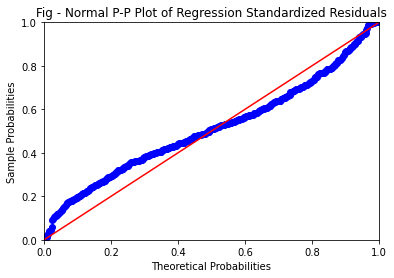

In [31]:
model_3_resid = model_3.resid 
probplot = sm.ProbPlot(model_3_resid) 
plt.figure( figsize = (8, 6)) 
probplot.ppplot( line='45' )
plt.title( "Fig - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

Now 'Total Income From Operations' became statistically insignificant with GDP as highly significant. However the residuals continue to remain normal.

## CONCLUSION on MODEL SELECTION : 

No further improvement with statistically significant factors. The model f-statistics indicae that the model is significant yet its is able to explain only around 10%

Also very slight improvements in residual regression.

We might need to check now with **lasso optimization** to eliminate true factors.



## Elimination by LASSO

In [36]:

# Takes a model as a parameter
# Prints the RMSE on train and test set 
def get_train_test_rmse( model ):
  # Predicting on training dataset
  y_train_pred = model.predict( train_X )
  # Compare the actual y with predicted y in the training dataset
  rmse_train = round(np.sqrt(metrics.mean_squared_error( train_y,y_train_pred)),3)
  # Predicting on test dataset
  y_test_pred = model.predict( test_X )
  # Compare the actual y with predicted y in the test dataset
  rmse_test = round(np.sqrt(metrics.mean_squared_error(test_y,y_test_pred)),3)
  print("train: ", rmse_train," test:", rmse_test)

In [37]:
 # Applying alpha = 1 and running the algorithms for maximum of 500 iterations
lasso = Lasso(alpha = 0.01, max_iter = 500) 
lasso.fit( train_X, train_y )

Lasso(alpha=0.01, max_iter=500)

In [38]:
get_train_test_rmse( lasso )

train:  0.987  test: 1.113


The differene between train and test is small. The model is is not overfitting. Surprisingly the test accuracy is higher. However both train and test accuracies are collectively underfitting.


In [39]:
## Storing the feature names and coefficient values in the DataFrame

lasso_coef_df = pd.DataFrame( { 'columns': train_X.columns ,'coef': lasso.coef_ } )

## Filtering out coefficients with zeros
lasso_coef_df[lasso_coef_df.coef == 0]

,columns,coef
0,Net Sales/Income from operations,0.0
1,const,0.0
2,Total Income From Operations,0.0
3,Consumption of Raw Materials,0.0
5,Depreciation,-0.0
6,Other Expenses,0.0
7,P/L Before Tax,-0.0
9,Net Profit/(Loss) For the Period,0.0
10,Equity Share Capital,0.0


### Generating Model basel on lasso elimination

In [40]:
X_lasso_features = list( set(X_features) - set(lasso_coef_df[lasso_coef_df.coef == 0]['columns'].to_list()))

lasso_model = sm.OLS(train_y, train_X[X_lasso_features]).fit()
lasso_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                  OLS                  Adj. R-squared (uncentered): 0.049    
Dependent Variable:     Next Stock Deviation AIC:                         1140.0241
Date:                   2022-09-03 20:03     BIC:                         1159.9814
No. Observations:       400                  Log-Likelihood:              -565.01  
Df Model:               5                    F-statistic:                 5.086    
Df Residuals:           395                  Prob (F-statistic):          0.000157 
R-squared (uncentered): 0.060                Scale:                       0.99976  
--------------------------------------------------------------------------------------
                         Coef.     Std.Err.       t       P>|t|      [0.025     0.975]
--------------------------------------------------------------------------------------
Gold Price (USD)         0.0141      0.0618     0.2288    0.8191    -0.1073     0.1356
GDP                     -0.2416      0.0583    -4.1461    0.0000    -0.3561    -0.1270
Employees Cost           0.1397      0.0983     1.4215    0.1560    -0.0535     0.3329
Tax                     -0.1368      0.0942    -1.4513    0.1475    -0.3220     0.0485
Basic EPS               -0.0571      0.0544    -1.0506    0.2941    -0.1641     0.0498
-----------------------------------------------------------------------------------
Omnibus:                   236.539            Durbin-Watson:               1.875   
Prob(Omnibus):             0.000              Jarque-Bera (JB):            2978.618
Skew:                      2.262              Prob(JB):                    0.000   
Kurtosis:                  15.580             Condition No.:               4       
===================================================================================

"""

### Model based on lasso only GDP is signficant. However it is able to explain same that is 6%. The factor influencing most now is Employee Cost and Tax  with 15% significance level.

## STEP 7: Validate the Model and Measure Model Accuracy

In [41]:
pred_y = next_stock_deviation_lm.predict( test_X )

np.abs(r2_score(test_y, pred_y))

0.60614901556249

In [42]:
lasso_pred_y = lasso.predict( test_X )

np.abs(r2_score(test_y, lasso_pred_y))

0.9466479457863819

The R2 score of lasso is high. This indicates that the lasso model cannot be rejected.

## STEP 8: Decide on Model Deployment

As we consider lasso model to be deployed , following inferences could be made:

1. At 15-16% level, GDP , Tax and Employee cost are significant.
2. GDP and Tax has negative impact o share deviations. However Emplyee cost has positive impact.